<img src="img/logo.png">

# Chargement des librairies

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#pip install yellowbrick
from yellowbrick.target import class_balance
import warnings
warnings.filterwarnings('ignore')
from scipy.ndimage import label
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Chargement du fichier

In [2]:
df = pd.read_csv('src/justjoin.csv')

In [3]:
df.sample(3)

,offer_type,title,id,b2b_from,b2b_to,permanent_from,permanent_to,experience_level,AWS,Azure,...,Machine Learning,Oracle,PL/SQL,Power BI,Python,SQL,Scala,Snowflake,Spark,T-SQL
737,data,"Senior Data Scientist, Marketing",vinted-senior-data-scientist-marketing,NaN,NaN,6400.0,8300.0,senior,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
660,data,SPECJALISTA DS. POWER BI,adamed-specjalista-ds-power-bi-wroclaw,NaN,NaN,NaN,NaN,mid,0.0,1.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
313,data,Data Engineer - IT Development Lead,bosch-polska-data-engineer-it-development-lead,NaN,NaN,NaN,NaN,mid,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **EDA**

## Vérification du type des colonnes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   offer_type        859 non-null    object 
 1   title             859 non-null    object 
 2   id                859 non-null    object 
 3   b2b_from          392 non-null    float64
 4   b2b_to            392 non-null    float64
 5   permanent_from    196 non-null    float64
 6   permanent_to      196 non-null    float64
 7   experience_level  859 non-null    object 
 8   AWS               859 non-null    float64
 9   Azure             859 non-null    float64
 10  Big Data          859 non-null    float64
 11  Cloud             859 non-null    float64
 12  Data              859 non-null    float64
 13  Data Science      859 non-null    float64
 14  Databases         859 non-null    float64
 15  ETL               859 non-null    float64
 16  English           859 non-null    float64
 1

## Aperçu des statistiques descriptives

In [5]:
df.describe()

,b2b_from,b2b_to,permanent_from,permanent_to,AWS,Azure,Big Data,Cloud,Data,Data Science,...,Machine Learning,Oracle,PL/SQL,Power BI,Python,SQL,Scala,Snowflake,Spark,T-SQL
count,392.000000,392.000000,196.000000,196.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,...,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,4577.135699,6088.710163,3224.595607,4612.407546,0.433062,0.109430,0.331781,0.144354,0.111758,0.181607,...,0.142026,0.266589,0.164144,0.208382,1.032596,1.311991,0.128056,0.158324,0.119907,0.264261
std,1503.405318,1564.550588,1533.251316,1689.584205,1.199699,0.579077,1.108582,0.743347,0.594528,0.798943,...,0.742227,0.919835,0.750956,0.776775,1.697073,1.779312,0.691198,0.775851,0.639283,0.873738
min,1491.000000,2130.000000,1065.000000,1171.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3621.000000,5325.000000,2023.500000,3408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4294.080000,5964.000000,3195.000000,4473.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5544.000000,7224.000000,3834.000000,5325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,9350.000000,9661.680000,9998.859000,12780.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000


## Distributions des skills

In [6]:
df.columns

Index(['offer_type', 'title', 'id', 'b2b_from', 'b2b_to', 'permanent_from',
       'permanent_to', 'experience_level', 'AWS', 'Azure', 'Big Data', 'Cloud',
       'Data', 'Data Science', 'Databases', 'ETL', 'English', 'Hadoop',
       'Machine Learning', 'Oracle', 'PL/SQL', 'Power BI', 'Python', 'SQL',
       'Scala', 'Snowflake', 'Spark', 'T-SQL'],
      dtype='object')

In [7]:
# Affichage des top 20 skills précédemment récupérés dans le fichier 0.Extraction_API
df.columns[8:]

Index(['AWS', 'Azure', 'Big Data', 'Cloud', 'Data', 'Data Science',
       'Databases', 'ETL', 'English', 'Hadoop', 'Machine Learning', 'Oracle',
       'PL/SQL', 'Power BI', 'Python', 'SQL', 'Scala', 'Snowflake', 'Spark',
       'T-SQL'],
      dtype='object')

In [8]:
# Utilisation de melt pour optimiser la visualisation avec Seaborn
# On affecte à 'value_vars' les top 20 skills
skills = df.melt(id_vars = ['experience_level'],
       value_vars = df.columns[8:])

In [9]:
skills = skills[skills['value'] > 0]
skills.sample(1)

,experience_level,variable,value
11497,senior,Power BI,3.0


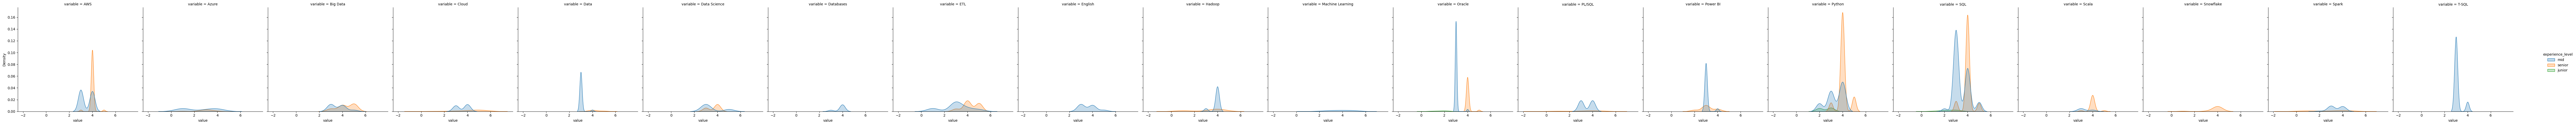

In [87]:
# Visualisation du niveau des top 20 compétences par niveau d'expérience
ax = sns.displot(data = skills,
                x = 'value',
                hue = 'experience_level',
                kind = 'kde',
                fill = True,
                col = 'variable',
                warn_singular=False)

## Distribution des rémunérations

In [13]:
df.columns

Index(['offer_type', 'title', 'id', 'b2b_from', 'b2b_to', 'permanent_from',
       'permanent_to', 'experience_level', 'AWS', 'Azure', 'Big Data', 'Cloud',
       'Data', 'Data Science', 'Databases', 'ETL', 'English', 'Hadoop',
       'Machine Learning', 'Oracle', 'PL/SQL', 'Power BI', 'Python', 'SQL',
       'Scala', 'Snowflake', 'Spark', 'T-SQL'],
      dtype='object')

In [14]:
# Utilisation de melt pour optimiser la visualisation avec Seaborn
salaries = df[['experience_level', 'b2b_from', 'b2b_to', 'permanent_from',
       'permanent_to']]

salaries = salaries.melt(id_vars = 'experience_level',
       value_vars = ['b2b_from', 'b2b_to', 'permanent_from',
       'permanent_to']).dropna()

salaries.sample(5)

,experience_level,variable,value
1792,mid,permanent_from,2023.5
1888,mid,permanent_from,2343.0
198,mid,b2b_from,4260.0
1764,mid,permanent_from,3195.0
1057,mid,b2b_to,5538.0


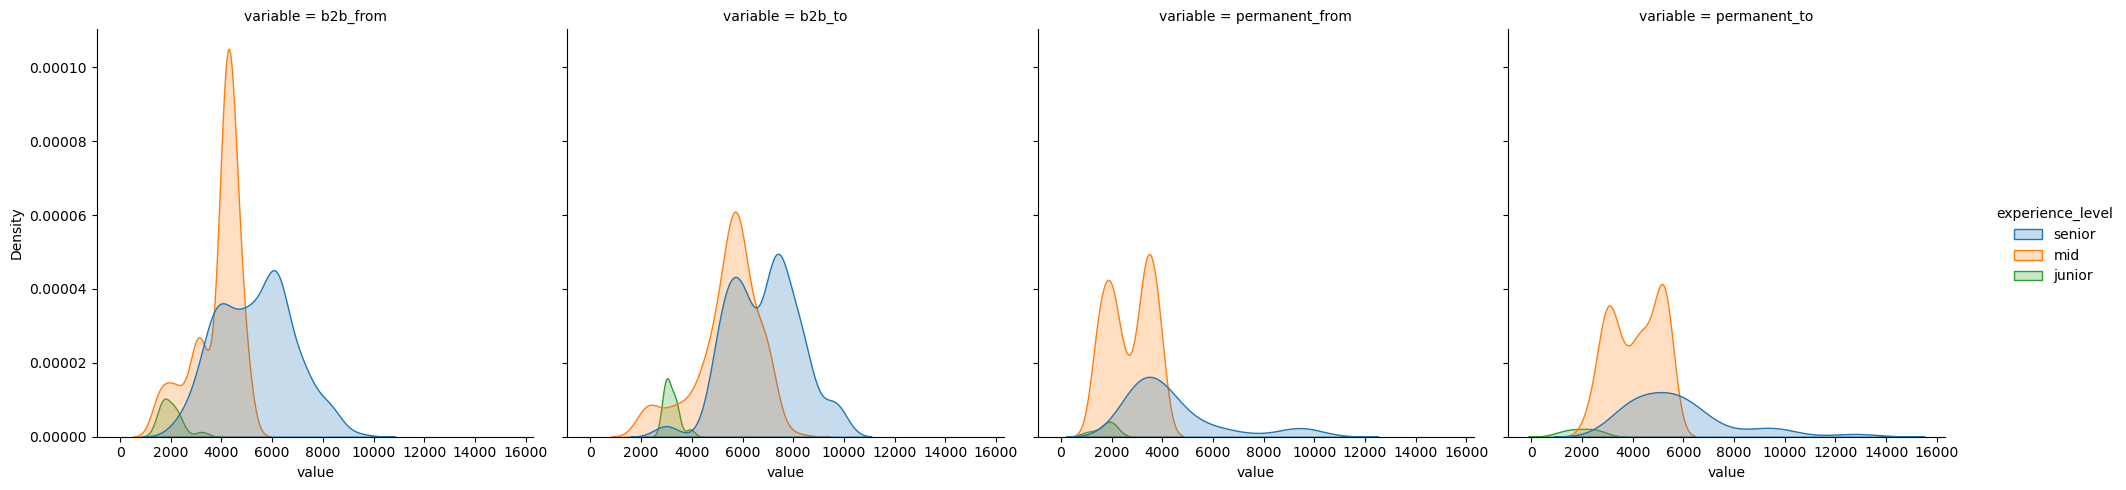

In [88]:
# Visualisation du niveau de rémunération par type de contrat et par niveau d'expérience
ax = sns.displot(data = salaries,
                 x ='value',
                 hue = 'experience_level',
                 kind = 'kde',
                 fill = True,
                 col = 'variable')

# **Métriques de classification**

In [16]:
# Création de la variable y_test avec 1 correspondant au niveau d'expérience senior
y_test = df.sample(100)['experience_level']
y_test = np.where(y_test == 'senior', 1, 0)
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [17]:
# Création de la variable y_pred avec des nombres entiers aléatoires entre 0 et 1
y_pred = np.random.randint(0, 2, len(y_test))
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

## Accuracy, Recall, Precision et F1

In [18]:
# création de fonction
def calculate_metrics(truth, prediction):
    print('Accuracy:\t ', round(accuracy_score(truth, prediction), 2))
    print('Recall:\t\t ', round(recall_score(truth, prediction), 2))
    print('Precision:\t ', round(precision_score(truth, prediction), 2))
    print('F1:\t\t ', round(f1_score(truth, prediction), 2))

In [19]:
calculate_metrics(y_test, y_pred)

Accuracy:	  0.52
Recall:		  0.6
Precision:	  0.38
F1:		  0.47


## Matrice de confusion

In [20]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[31, 34],
       [14, 21]])

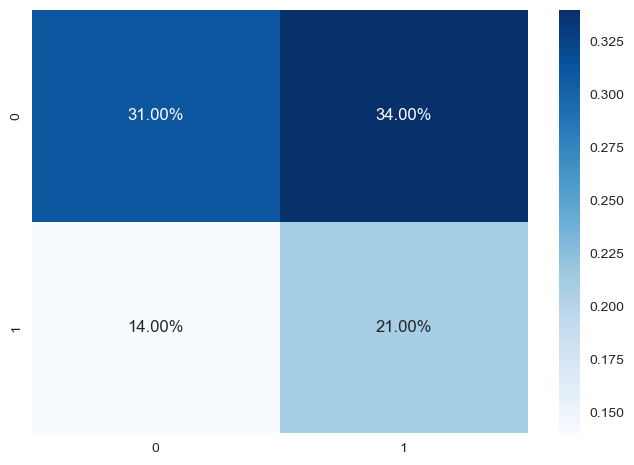

In [21]:
# Visualisation de la matrice d'erreur
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

# **Modélisation**

## ***Répartition en sous-ensembles X et y***

In [22]:
X = df[df['b2b_from'].notnull()].loc[:,['b2b_from', 'b2b_to']]
y = df[df['b2b_from'].notnull()].loc[:,['experience_level']]

In [23]:
y = np.where(y == 'senior', 1, 0)
pd.DataFrame(y).value_counts()

1    207
0    185
dtype: int64

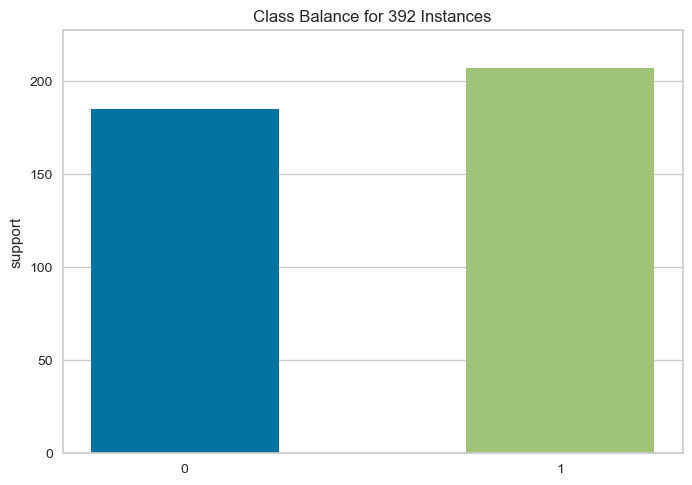

ClassBalance(ax=<AxesSubplot: title={'center': 'Class Balance for 392 Instances'}, ylabel='support'>)

In [24]:
class_balance(y.flatten())
#y.flatten()
#y.reshape(-1, 1)

In [25]:
# Division de X et y en train/test
X_train, X_test, y_train, y_test = train_test_split(
                            X, 
                            y, 
                            test_size=0.2, 
                            random_state=42, 
                            stratify=y) #stratify que pour classification

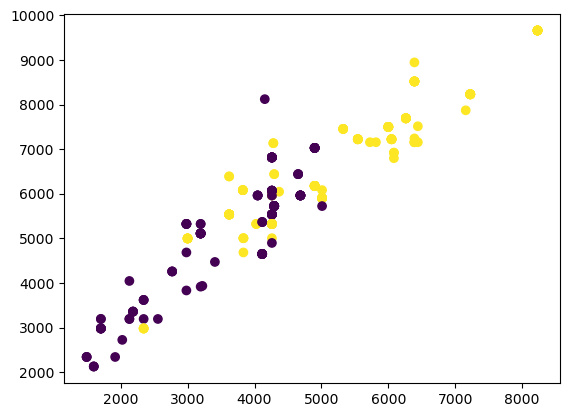

In [26]:
# Visualisation en nuage de points de la rémunération en fonction de l'expérience senior vs non-senior
mpl.style.use('default')

fig, ax = plt.subplots()
ax.scatter(X_train['b2b_from'],
          X_train['b2b_to'],
          c=y_train)
#ax.set_facecolor('green')
plt.show()

## ***Régression logistique***

### Avant standardisation

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_train_pred = lr.predict(X_train)

#### Accuracy, Recall, Precision et F1 

In [29]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.65
Recall:		  0.75
Precision:	  0.65
F1:		  0.69


#### Matrice de confusion

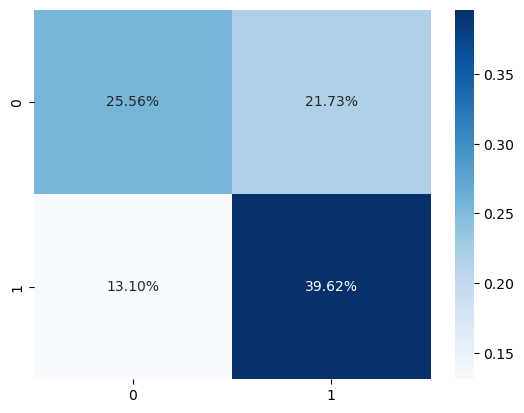

In [30]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

In [31]:
# Création d'une fonction de visualisation de la justesse des prédictions 
def plot_decision_area(estimator, X, y, threshold=0.5, binary=True):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1000), 
                         np.linspace(x2_min, x2_max, 1000))
    
    predicted = estimator.predict_proba(np.column_stack((x1.flatten(), 
                                            x2.flatten())))[:,1].reshape(x1.shape)
    if binary:
        predicted = np.where(predicted >= threshold, 1, 0)

    fig, ax = plt.subplots()
    pc = ax.pcolormesh(x1, x2, predicted)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')

    if not binary:
        plt.colorbar(pc)

    plt.show()

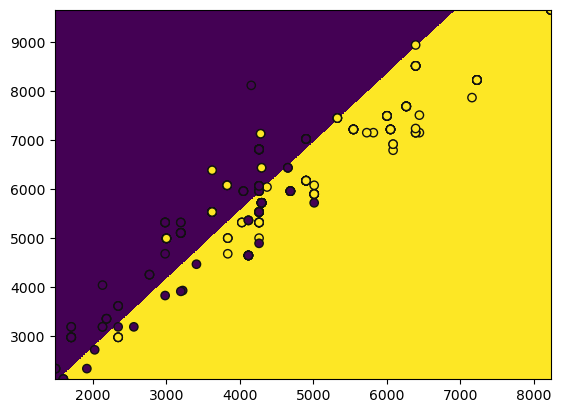

In [32]:
plot_decision_area(lr, X_train.values, y_train) # avant standardisation

### Après standardisation

In [33]:
sc =StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [34]:
lr = LogisticRegression()
lr.fit(X_train_sc, y_train)

y_train_pred = lr.predict(X_train_sc)

#### Accuracy, Recall, Precision et F1 

In [35]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.76
Recall:		  0.66
Precision:	  0.84
F1:		  0.74


#### Matrice de confusion

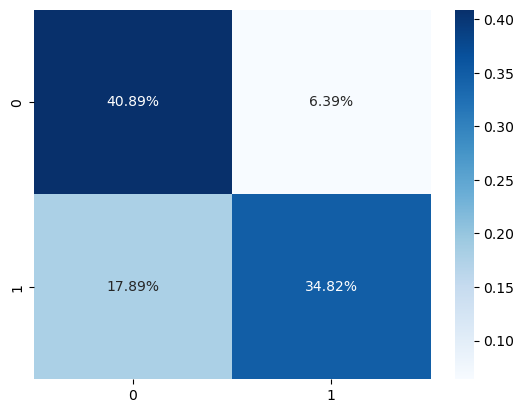

In [36]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

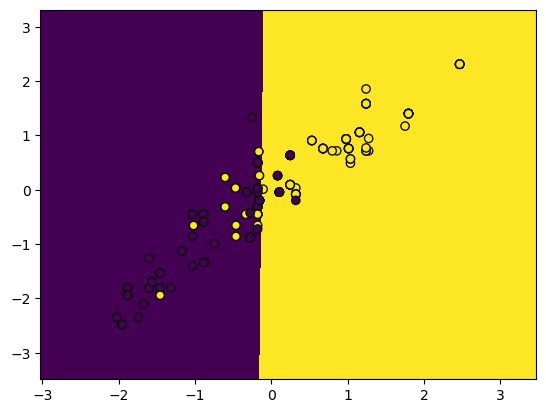

In [37]:
plot_decision_area(lr, X_train_sc, y_train) # après standardisation

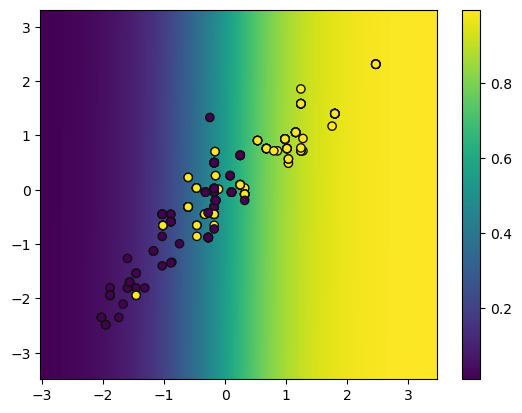

In [38]:
plot_decision_area(lr, X_train_sc, y_train, threshold=0.5, binary=False)

## ***Régression logistique multinomiale***

In [39]:
# Création de Pipeline
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)), 
    ('lr', LogisticRegression())
])

In [40]:
pipe.fit(X_train_sc, y_train)
y_train_pred = pipe.predict(X_train_sc)

### Accuracy, Recall, Precision et F1 

In [41]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.75
Recall:		  0.65
Precision:	  0.84
F1:		  0.74


### Matrice de confusion

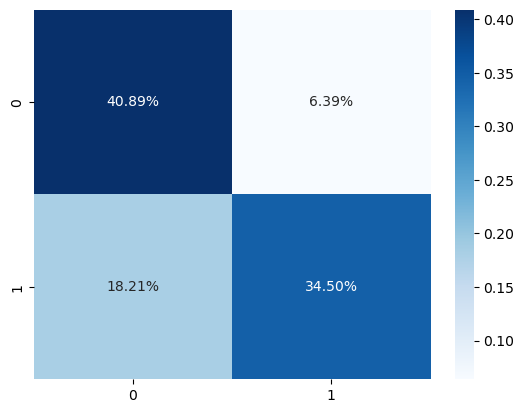

In [42]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

### Visualisation

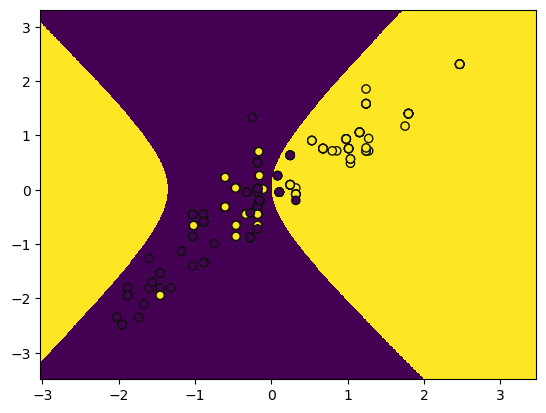

In [43]:
plot_decision_area(pipe, X_train_sc, y_train, binary=True)

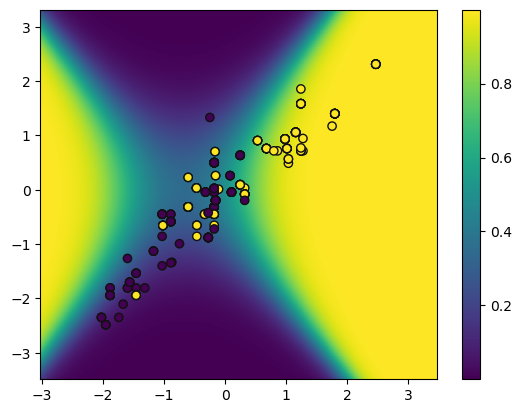

In [44]:
plot_decision_area(pipe, X_train_sc, y_train, binary=False)

## ***SVM/SVC***

### Kernel linéaire

In [45]:
svc = SVC(probability=True, kernel='linear', C=1) #C important pour SVM/SVC

svc.fit(X_train_sc, y_train)
y_train_pred = svc.predict(X_train_sc)

#### Accuracy, Recall, Precision et F1

In [46]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.76
Recall:		  0.65
Precision:	  0.86
F1:		  0.74


#### Matrice de confusion

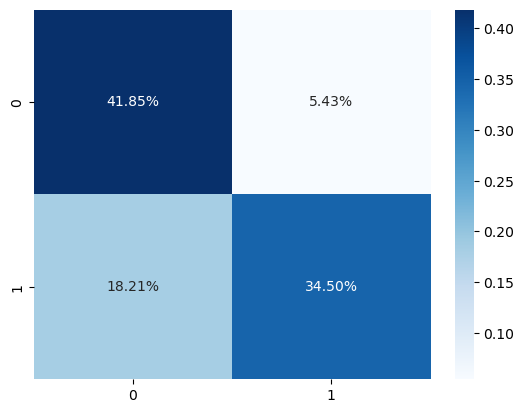

In [47]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

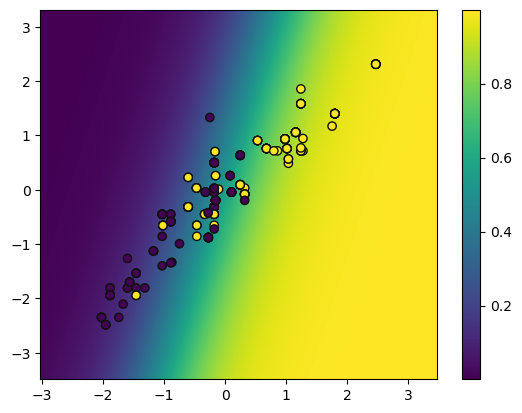

In [48]:
plot_decision_area(svc, X_train_sc, y_train, binary=False)

### Kernel polynomial

In [49]:
svc = SVC(probability=True, kernel='poly', C=1, degree=3) #C important pour SVM/SVC

svc.fit(X_train_sc, y_train)
y_train_pred = svc.predict(X_train_sc)

#### Accuracy, Recall, Precision et F1

In [50]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.7
Recall:		  0.48
Precision:	  0.9
F1:		  0.63


#### Matrice de confusion

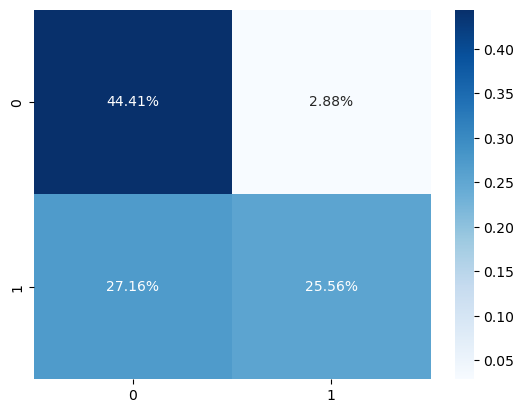

In [51]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

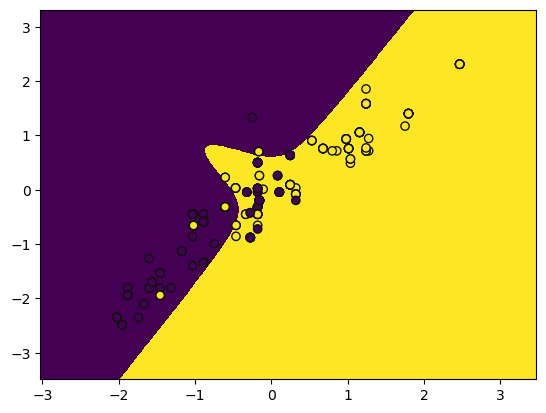

In [52]:
plot_decision_area(svc, X_train_sc, y_train, binary=True)

### Kernel gaussien (radial)

In [53]:
# gamma 10
svc = SVC(probability=True, kernel='rbf', C=1, gamma=10) #C important pour SVM/SVC

svc.fit(X_train_sc, y_train)
y_train_pred = svc.predict(X_train_sc)

#### Accuracy, Recall, Precision et F1

In [54]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.96
Recall:		  0.97
Precision:	  0.96
F1:		  0.96


#### Matrice de confusion

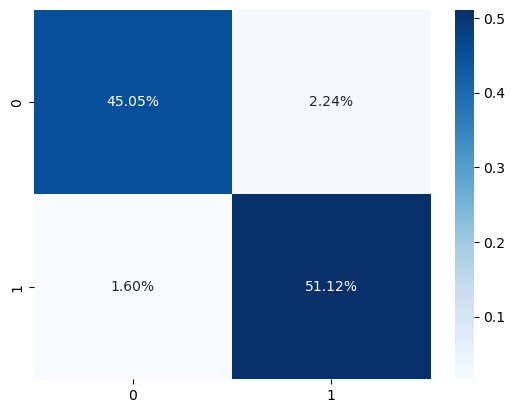

In [55]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

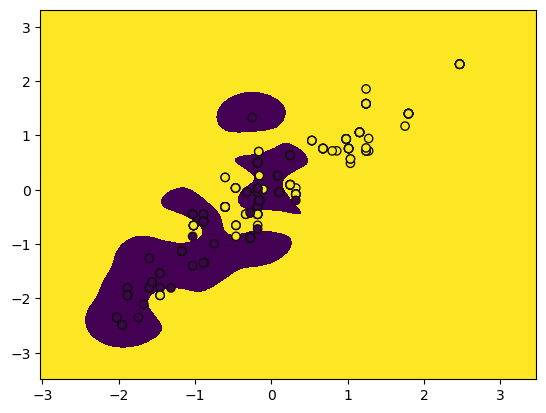

In [56]:
plot_decision_area(svc, X_train_sc, y_train, binary=True) #overfitting

In [57]:
# gamma 100
svc = SVC(probability=True, kernel='rbf', C=1, gamma=100) #C important pour SVM/SVC

svc.fit(X_train_sc, y_train)
y_train_pred = svc.predict(X_train_sc)

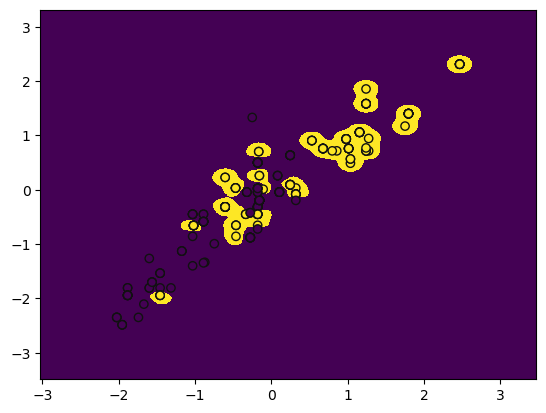

In [58]:
plot_decision_area(svc, X_train_sc, y_train, binary=True) #overfitting

In [59]:
# gamma 0.1
svc = SVC(probability=True, kernel='rbf', C=1, gamma=0.1) #C important pour SVM/SVC

svc.fit(X_train_sc, y_train)
y_train_pred = svc.predict(X_train_sc)

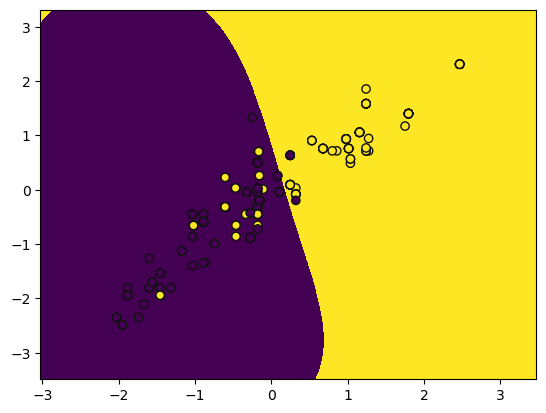

In [60]:
plot_decision_area(svc, X_train_sc, y_train, binary=True) #better

## ***KNN*** (quand peu de données)

In [61]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_sc, y_train)
y_train_pred = knn.predict(X_train_sc)

#### Accuracy, Recall, Precision et F1

In [62]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.94
Recall:		  0.93
Precision:	  0.94
F1:		  0.94


#### Matrice de confusion

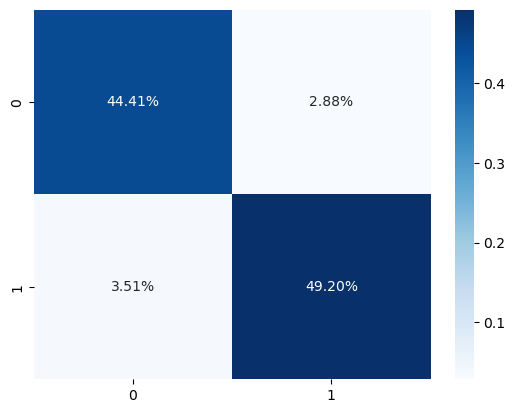

In [63]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

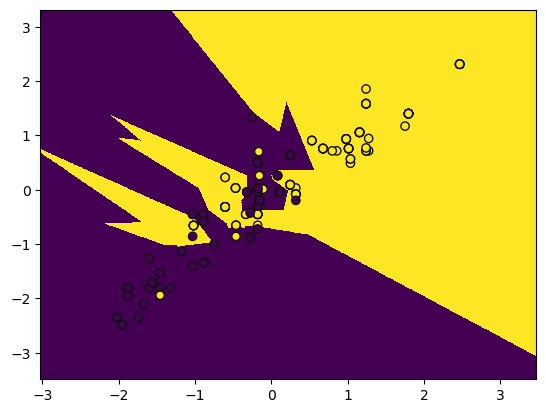

In [64]:
plot_decision_area(knn, X_train_sc, y_train, binary=True)

## ***Naive Bayes***

### Gaussian NB

In [65]:
gnb = GaussianNB()
gnb.fit(X_train_sc, y_train)

y_train_pred = gnb.predict(X_train_sc)

#### Accuracy, Recall, Precision et F1

In [66]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.72
Recall:		  0.68
Precision:	  0.76
F1:		  0.72


#### Matrice de confusion

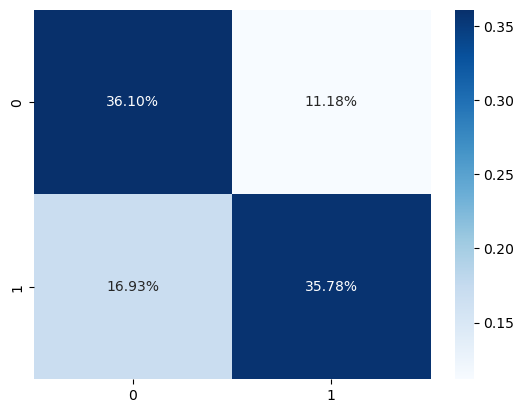

In [67]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

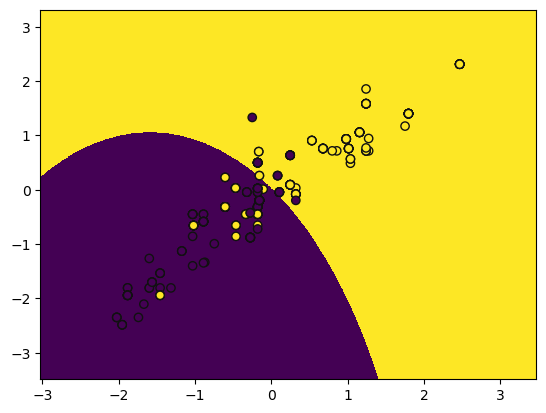

In [68]:
plot_decision_area(gnb, X_train_sc, y_train, binary=True)

### Multinomial NB

In [69]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train) # la standardisation donne des chiffres négatifs et erreurs
# donc il faut : soit ne pas faire de standardisation, soit faire une normalisation

y_train_pred = mnb.predict(X_train)

#### Accuracy, Recall, Precision et F1

In [70]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.66
Recall:		  0.75
Precision:	  0.66
F1:		  0.7


#### Matrice de confusion

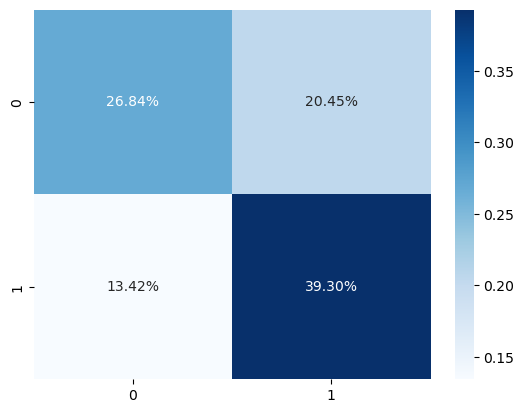

In [71]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

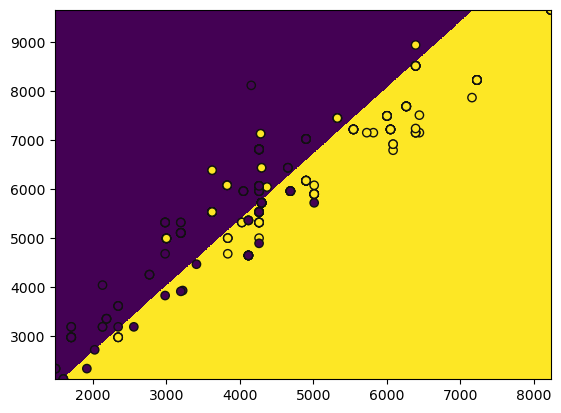

In [72]:
plot_decision_area(mnb, X_train.values, y_train, binary=True)

## ***Apprentissage ensembliste***

### Bootstrap aggregation (Bagging)

In [73]:
dtc = DecisionTreeClassifier(max_depth = 10) #3
dtc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)

#### Accuracy, Recall, Precision et F1

In [74]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.99
Recall:		  0.99
Precision:	  0.99
F1:		  0.99


#### Matrice de confusion

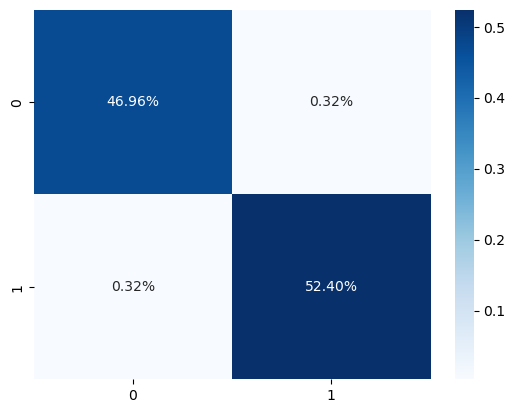

In [75]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

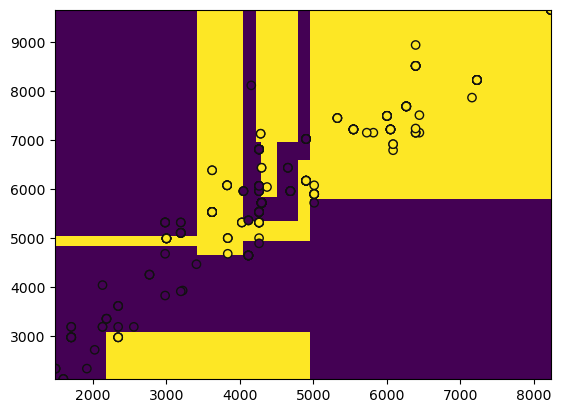

In [76]:
plot_decision_area(dtc, X_train.values, y_train, binary=True)

### Random Forest (arbres décisionnels)

In [77]:
# Random Forest ne nécessite pas de standardisation
rfc = RandomForestClassifier(max_depth = 10,
                             n_estimators = 10)

rfc.fit(X_train, y_train)

y_train_pred = dtc.predict(X_train)
y_test_pred = rfc.predict(X_train)

#### Accuracy, Recall, Precision et F1

In [78]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.99
Recall:		  0.99
Precision:	  0.99
F1:		  0.99


#### Matrice de confusion

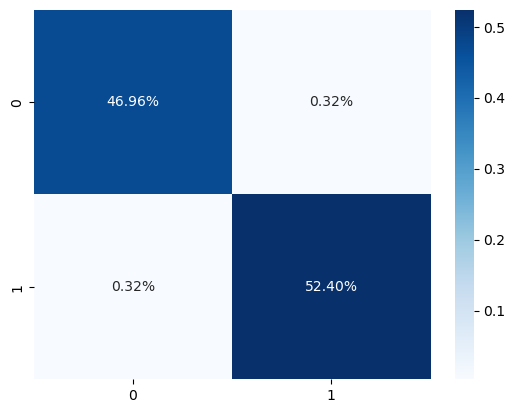

In [79]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

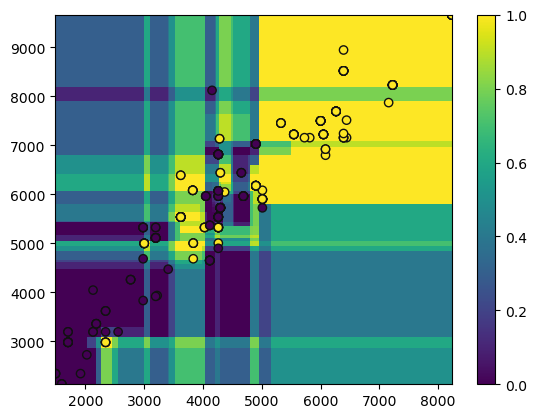

In [80]:
plot_decision_area(rfc, X_train.values, y_train, binary=False)

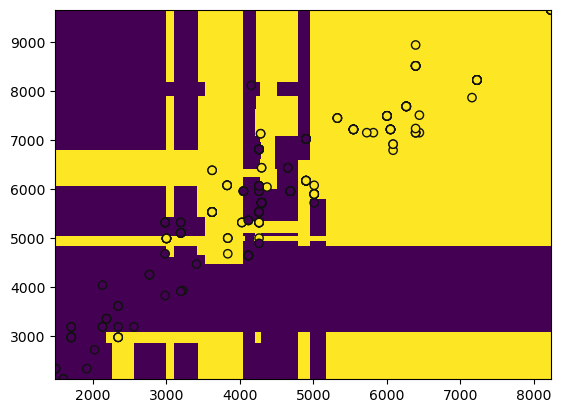

In [81]:
plot_decision_area(rfc, X_train.values, y_train, binary=True)

### Boosting

In [82]:
abc = AdaBoostClassifier(n_estimators = 10)

abc.fit(X_train, y_train)

y_train_pred = abc.predict(X_train)
y_test_pred = abc.predict(X_test)

#### Accuracy, Recall, Precision et F1

In [83]:
calculate_metrics(y_train, y_train_pred)

Accuracy:	  0.87
Recall:		  0.83
Precision:	  0.92
F1:		  0.87


In [84]:
calculate_metrics(y_test, y_test_pred)

Accuracy:	  0.85
Recall:		  0.81
Precision:	  0.89
F1:		  0.85


#### Matrice de confusion

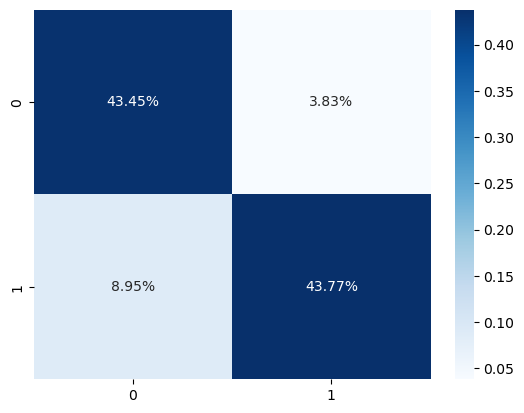

In [85]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues');

#### Visualisation

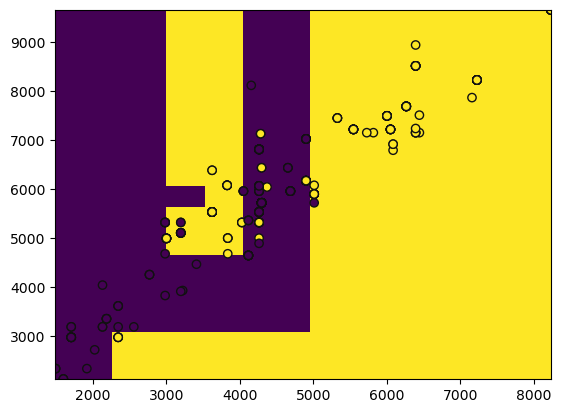

In [86]:
plot_decision_area(abc, X_train.values, y_train, binary=True)